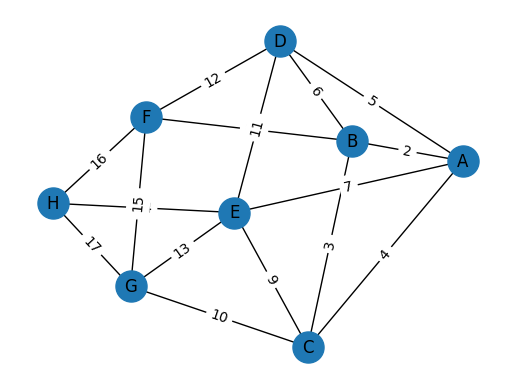

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Define the vertices
vertices = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

# Add nodes to the graph
G.add_nodes_from(vertices)

# Define the edges with their weights
edges = [('A', 'B', 2), ('A', 'C', 4), ('A', 'D', 5), ('A', 'E', 7),
         ('B', 'C', 3), ('B', 'D', 6), ('B', 'F', 8),
         ('C', 'E', 9), ('C', 'G', 10),
         ('D', 'E', 11), ('D', 'F', 12),
         ('E', 'G', 13), ('E', 'H', 14),
         ('F', 'G', 15), ('F', 'H', 16),
         ('G', 'H', 17)]

# Add edges to the graph with their weights
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=500)

# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1)

# Draw edge labels
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Draw node labels
node_labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels)

# Show the graph
plt.axis('off')
plt.show()


In [2]:
class DisjointSet:
    def __init__(self, vertices):
        self.parent = {v: v for v in vertices}
        self.rank = {v: 0 for v in vertices}

    def find(self, vertex):
        if self.parent[vertex] != vertex:
            self.parent[vertex] = self.find(self.parent[vertex])
        return self.parent[vertex]

    def union(self, root1, root2):
        if self.rank[root1] < self.rank[root2]:
            self.parent[root1] = root2
        elif self.rank[root1] > self.rank[root2]:
            self.parent[root2] = root1
        else:
            self.parent[root2] = root1
            self.rank[root1] += 1


def kruskal_mst(graph):
    result = []
    edges = sorted(graph, key=lambda x: x[2])
    vertices = set()
    for edge in edges:
        vertices.add(edge[0])
        vertices.add(edge[1])

    disjoint_set = DisjointSet(vertices)

    for edge in edges:
        u, v, weight = edge
        root1 = disjoint_set.find(u)
        root2 = disjoint_set.find(v)

        if root1 != root2:
            result.append(edge)
            disjoint_set.union(root1, root2)
            print(f"Selected edge: {u} - {v}, Weight: {weight}")
        else:
            print(f"Skipping edge: {u} - {v} (Forms cycle)")

    return result


# Define the graph
edges = [('A', 'B', 2), ('A', 'C', 4), ('A', 'D', 5), ('A', 'E', 7),
         ('B', 'C', 3), ('B', 'D', 6), ('B', 'F', 8),
         ('C', 'E', 9), ('C', 'G', 10),
         ('D', 'E', 11), ('D', 'F', 12),
         ('E', 'G', 13), ('E', 'H', 14),
         ('F', 'G', 15), ('F', 'H', 16),
         ('G', 'H', 17)]

# Run Kruskal's algorithm
mst = kruskal_mst(edges)


Selected edge: A - B, Weight: 2
Selected edge: B - C, Weight: 3
Skipping edge: A - C (Forms cycle)
Selected edge: A - D, Weight: 5
Skipping edge: B - D (Forms cycle)
Selected edge: A - E, Weight: 7
Selected edge: B - F, Weight: 8
Skipping edge: C - E (Forms cycle)
Selected edge: C - G, Weight: 10
Skipping edge: D - E (Forms cycle)
Skipping edge: D - F (Forms cycle)
Skipping edge: E - G (Forms cycle)
Selected edge: E - H, Weight: 14
Skipping edge: F - G (Forms cycle)
Skipping edge: F - H (Forms cycle)
Skipping edge: G - H (Forms cycle)


In [3]:
import heapq

# Define the graph as an adjacency list
graph = {
    'A': {'B': 2, 'C': 4, 'D': 5, 'E': 7},
    'B': {'A': 2, 'C': 3, 'D': 6, 'F': 8},
    'C': {'A': 4, 'B': 3, 'E': 9, 'G': 10},
    'D': {'A': 5, 'B': 6, 'E': 11, 'F': 12},
    'E': {'A': 7, 'C': 9, 'D': 11, 'G': 13, 'H': 14},
    'F': {'B': 8, 'D': 12, 'G': 15, 'H': 16},
    'G': {'C': 10, 'E': 13, 'F': 15, 'H': 17},
    'H': {'E': 14, 'F': 16, 'G': 17}
}

def dijkstra(graph, start):
    # Initialize distances to vertices as infinity except for the start vertex
    distances = {vertex: float('inf') for vertex in graph}
    distances[start] = 0

    # Initialize a priority queue with the start vertex
    pq = [(0, start)]  # (distance, vertex)
    heapq.heapify(pq)

    # Keep track of finalized vertices and their costs
    finalized = {}
    
    while pq:
        current_distance, current_vertex = heapq.heappop(pq)

        # Skip if this node has already been finalized
        if current_vertex in finalized:
            continue

        finalized[current_vertex] = current_distance

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return finalized, distances

# Run Dijkstra's algorithm starting from vertex 'A'
finalized_vertices, shortest_paths = dijkstra(graph, 'A')

# Print out the order of vertices finalized and their costs
print("Finalized Vertices and Their Costs:")
for vertex, cost in sorted(finalized_vertices.items(), key=lambda x: x[1]):
    print(f"{vertex}: {cost}")

# Make a table of shortest paths and path lengths from vertex 'A'
print("\nShortest Paths and Path Lengths from Vertex A:")
print("Vertex \t Shortest Path \t Path Length")
for vertex, distance in shortest_paths.items():
    path = [vertex]
    current = vertex
    while current != 'A':
        for neighbor, weight in graph[current].items():
            if shortest_paths[current] == shortest_paths[neighbor] + weight:
                path.append(neighbor)
                current = neighbor
                break
    path.reverse()
    print(f"{vertex} \t {' -> '.join(path)} \t {distance}")


Finalized Vertices and Their Costs:
A: 0
B: 2
C: 4
D: 5
E: 7
F: 10
G: 14
H: 21

Shortest Paths and Path Lengths from Vertex A:
Vertex 	 Shortest Path 	 Path Length
A 	 A 	 0
B 	 A -> B 	 2
C 	 A -> C 	 4
D 	 A -> D 	 5
E 	 A -> E 	 7
F 	 A -> B -> F 	 10
G 	 A -> C -> G 	 14
H 	 A -> E -> H 	 21


In [5]:
import heapq

# Define the graph as an adjacency list
graph = {
    'A': {'B': 2, 'C': 4, 'D': 5, 'E': 7},
    'B': {'A': 2, 'C': 3, 'D': 6, 'F': 8},
    'C': {'A': 4, 'B': 3, 'E': 9, 'G': 10},
    'D': {'A': 5, 'B': 6, 'E': 11, 'F': 12},
    'E': {'A': 7, 'C': 9, 'D': 11, 'G': 13, 'H': 14},
    'F': {'B': 8, 'D': 12, 'G': 15, 'H': 16},
    'G': {'C': 10, 'E': 13, 'F': 15, 'H': 17},
    'H': {'E': 14, 'F': 16, 'G': 17}
}

def dijkstra(graph, start):
    # Initialize distances to vertices as infinity except for the start vertex
    distances = {vertex: float('inf') for vertex in graph}
    distances[start] = 0

    # Initialize a priority queue with the start vertex
    pq = [(0, start)]  # (distance, vertex)
    heapq.heapify(pq)

    # Keep track of finalized vertices and their costs
    finalized = {}
    prev_costs = {vertex: None for vertex in graph}
    
    while pq:
        current_distance, current_vertex = heapq.heappop(pq)

        # Skip if this node has already been finalized
        if current_vertex in finalized:
            continue

        finalized[current_vertex] = current_distance

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                prev_costs[neighbor] = current_vertex  # Update previous cost
                heapq.heappush(pq, (distance, neighbor))

    return finalized, distances, prev_costs

# Run Dijkstra's algorithm starting from vertex 'A'
finalized_vertices, shortest_paths, previous_costs = dijkstra(graph, 'A')

# Print out the order of vertices finalized and their costs along with previous costs
print("Finalized Vertices, Their Costs, and Parent Costs:")
for vertex, cost in sorted(finalized_vertices.items(), key=lambda x: x[1]):
    prev_cost = previous_costs[vertex]
    print(f"{vertex}: Cost - {cost}, Parent Cost from {prev_cost}: {shortest_paths[prev_cost]}" if prev_cost else f"{vertex}: Cost - {cost}")

# Make a table of shortest paths and path lengths from vertex 'A'
print("\nShortest Paths and Path Lengths from Vertex A:")
print("Vertex \t Shortest Path \t Path Length")
for vertex, distance in shortest_paths.items():
    path = [vertex]
    current = vertex
    while current != 'A':
        for neighbor, weight in graph[current].items():
            if shortest_paths[current] == shortest_paths[neighbor] + weight:
                path.append(neighbor)
                current = neighbor
                break
    path.reverse()
    print(f"{vertex} \t {' -> '.join(path)} \t {distance}")


Finalized Vertices, Their Costs, and Parent Costs:
A: Cost - 0
B: Cost - 2, Parent Cost from A: 0
C: Cost - 4, Parent Cost from A: 0
D: Cost - 5, Parent Cost from A: 0
E: Cost - 7, Parent Cost from A: 0
F: Cost - 10, Parent Cost from B: 2
G: Cost - 14, Parent Cost from C: 4
H: Cost - 21, Parent Cost from E: 7

Shortest Paths and Path Lengths from Vertex A:
Vertex 	 Shortest Path 	 Path Length
A 	 A 	 0
B 	 A -> B 	 2
C 	 A -> C 	 4
D 	 A -> D 	 5
E 	 A -> E 	 7
F 	 A -> B -> F 	 10
G 	 A -> C -> G 	 14
H 	 A -> E -> H 	 21


In [ ]:
# Create an empty graph
G = nx.Graph()

# Define the vertices
vertices = ['A', 'B', 'C']

# Add nodes to the graph
G.add_nodes_from(vertices)

# Define the edges with their weights
edges = [('A', 'B', 2), ('A', 'C', 4),('B', 'C', 3)]

# Add edges to the graph with their weights
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=500)

# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1)

# Draw edge labels
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Draw node labels
node_labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels)

# Show the graph
plt.axis('off')
plt.show()

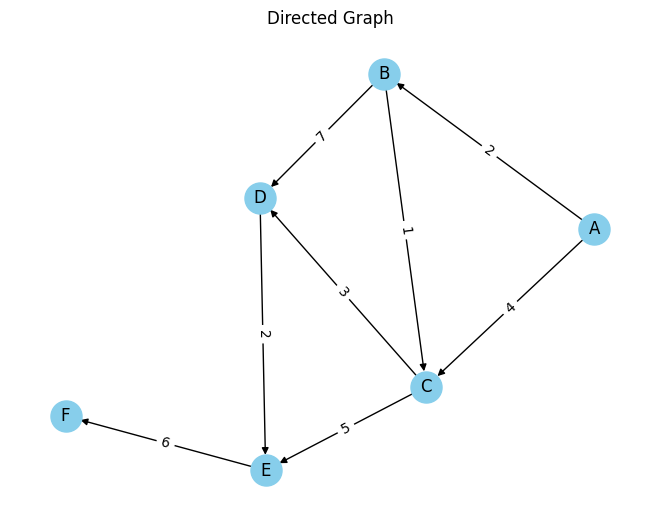

Distances from A to each vertex:
To A: 0
To B: 2
To C: 3
To D: 6
To E: 8
To F: 14

Shortest Tree:
A -> ['B']
B -> ['C']
C -> ['D', 'E']
D -> []
E -> ['F']
F -> []


In [7]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# Function to run Dijkstra's algorithm for directed graphs
def dijkstra_directed(graph, start):
    distances = {vertex: float('inf') for vertex in graph}
    distances[start] = 0
    tree = {vertex: [] for vertex in graph}

    pq = [(0, start, start)]  # (distance, current_vertex, previous_vertex)
    heapq.heapify(pq)

    while pq:
        current_distance, current_vertex, previous_vertex = heapq.heappop(pq)

        if current_distance > distances[current_vertex]:
            continue

        if current_vertex != start:
            tree[previous_vertex].append(current_vertex)

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor, current_vertex))

    return distances, tree

# Example graph with 6 vertices including explicit edge weights
graph = {
    'A': {'B': 2, 'C': 4},
    'B': {'C': 1, 'D': 7},
    'C': {'D': 3, 'E': 5},
    'D': {'E': 2},
    'E': {'F': 6},
    'F': {}
}

# Print the graph (before running Dijkstra's algorithm)
G = nx.DiGraph()

for node, edges in graph.items():
    G.add_node(node)
    for edge, weight in edges.items():
        G.add_edge(node, edge, weight=weight)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue')
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Directed Graph')
plt.show()

# Run Dijkstra's algorithm on the graph
source_vertex = 'A'
distances, shortest_tree = dijkstra_directed(graph, source_vertex)

# Print the distances from source vertex to each vertex
print(f"Distances from {source_vertex} to each vertex:")
for vertex, distance in distances.items():
    print(f"To {vertex}: {distance}")

# Print the tree rooted at the source vertex representing the shortest paths
print("\nShortest Tree:")
for vertex, neighbors in shortest_tree.items():
    print(f"{vertex} -> {neighbors}")


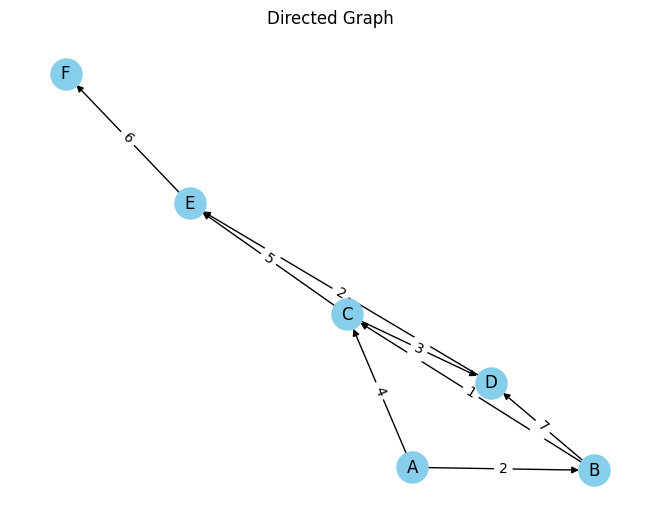

Distances from A to each vertex:
To A: 0
To B: 2
To C: 3
To D: 6
To E: 8
To F: 14

Shortest Tree:
A -> A: []
A -> B: ['A']
A -> C: ['B']
A -> D: ['C']
A -> E: ['C']
A -> F: ['E']


In [8]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# Function to run Dijkstra's algorithm for directed graphs
def dijkstra_directed(graph, start):
    distances = {vertex: float('inf') for vertex in graph}
    distances[start] = 0
    tree = {vertex: [] for vertex in graph}

    pq = [(0, start, start)]  # (distance, current_vertex, previous_vertex)
    heapq.heapify(pq)

    while pq:
        current_distance, current_vertex, previous_vertex = heapq.heappop(pq)

        if current_distance > distances[current_vertex]:
            continue

        if current_vertex != start:
            tree[current_vertex].append(previous_vertex)

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor, current_vertex))

    return distances, tree

# Example graph with 6 vertices including explicit edge weights
graph = {
    'A': {'B': 2, 'C': 4},
    'B': {'C': 1, 'D': 7},
    'C': {'D': 3, 'E': 5},
    'D': {'E': 2},
    'E': {'F': 6},
    'F': {}
}

# Print the graph (before running Dijkstra's algorithm)
G = nx.DiGraph()

for node, edges in graph.items():
    G.add_node(node)
    for edge, weight in edges.items():
        G.add_edge(node, edge, weight=weight)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue')
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Directed Graph')
plt.show()

# Run Dijkstra's algorithm on the graph
source_vertex = 'A'
distances, shortest_tree = dijkstra_directed(graph, source_vertex)

# Print the distances from source vertex to each vertex
print(f"Distances from {source_vertex} to each vertex:")
for vertex, distance in distances.items():
    print(f"To {vertex}: {distance}")

# Print the tree rooted at the source vertex representing the shortest paths
print("\nShortest Tree:")
for vertex, neighbors in shortest_tree.items():
    print(f"{source_vertex} -> {vertex}: {neighbors}")


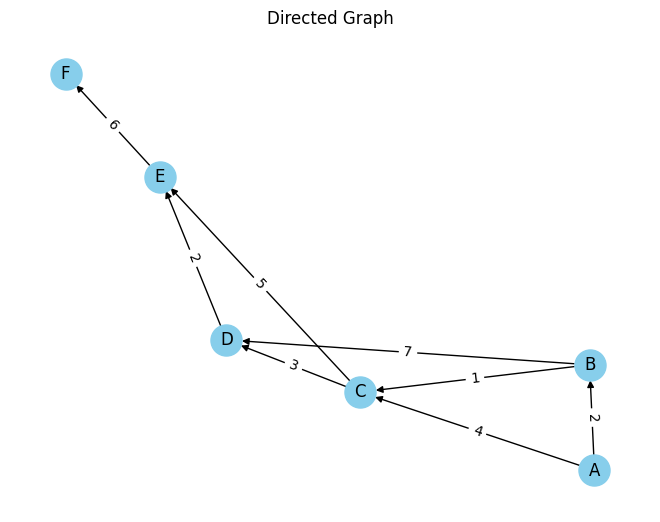

Distances from A to each vertex:
To A: 0
To B: 2
To C: 3
To D: 6
To E: 8
To F: 14

Shortest Tree:
A -> A: []
A -> B: ['A']
A -> C: ['B']
A -> D: ['C']
A -> E: ['C']
A -> F: ['E']

Costs while finalizing and Previous Costs:
A: Cost - 0, Previous Cost from A: 0
B: Cost - 2, Previous Cost from A: 0
C: Cost - 3, Previous Cost from B: 2
D: Cost - 6, Previous Cost from C: 3
E: Cost - 8, Previous Cost from C: 3
F: Cost - 14, Previous Cost from E: 8


In [9]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# Function to run Dijkstra's algorithm for directed graphs
def dijkstra_directed(graph, start):
    distances = {vertex: float('inf') for vertex in graph}
    distances[start] = 0
    tree = {vertex: [] for vertex in graph}
    prev_costs = {vertex: None for vertex in graph}

    pq = [(0, start, start)]  # (distance, current_vertex, previous_vertex)
    heapq.heapify(pq)

    while pq:
        current_distance, current_vertex, previous_vertex = heapq.heappop(pq)

        if current_distance > distances[current_vertex]:
            continue

        if current_vertex != start:
            tree[current_vertex].append(previous_vertex)

        prev_costs[current_vertex] = previous_vertex

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor, current_vertex))

    return distances, tree, prev_costs

# Example graph with 6 vertices including explicit edge weights
graph = {
    'A': {'B': 2, 'C': 4},
    'B': {'C': 1, 'D': 7},
    'C': {'D': 3, 'E': 5},
    'D': {'E': 2},
    'E': {'F': 6},
    'F': {}
}

# Print the graph (before running Dijkstra's algorithm)
G = nx.DiGraph()

for node, edges in graph.items():
    G.add_node(node)
    for edge, weight in edges.items():
        G.add_edge(node, edge, weight=weight)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue')
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Directed Graph')
plt.show()

# Run Dijkstra's algorithm on the graph
source_vertex = 'A'
distances, shortest_tree, prev_costs = dijkstra_directed(graph, source_vertex)

# Print the distances from source vertex to each vertex
print(f"Distances from {source_vertex} to each vertex:")
for vertex, distance in distances.items():
    print(f"To {vertex}: {distance}")

# Print the tree rooted at the source vertex representing the shortest paths
print("\nShortest Tree:")
for vertex, neighbors in shortest_tree.items():
    print(f"{source_vertex} -> {vertex}: {neighbors}")

# Print the costs while being finalized and previous costs of the parents
print("\nCosts while finalizing and Previous Costs:")
for vertex, cost in distances.items():
    prev_cost = prev_costs[vertex]
    print(f"{vertex}: Cost - {cost}, Previous Cost from {prev_cost}: {distances[prev_cost]}" if prev_cost else f"{vertex}: Cost - {cost}")


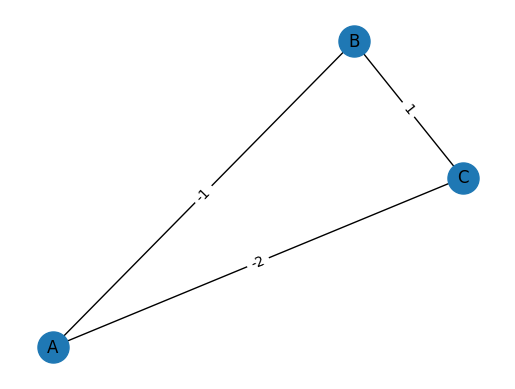

In [10]:
# Create an empty graph
G = nx.Graph()

# Define the vertices
vertices = ['A', 'B', 'C']

# Add nodes to the graph
G.add_nodes_from(vertices)

# Define the edges with their weights
edges = [('A', 'B', -1), ('A', 'C', -2), ('B', 'C', 1)]

# Add edges to the graph with their weights
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=500)

# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1)

# Draw edge labels
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Draw node labels
node_labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels)

# Show the graph
plt.axis('off')
plt.show()


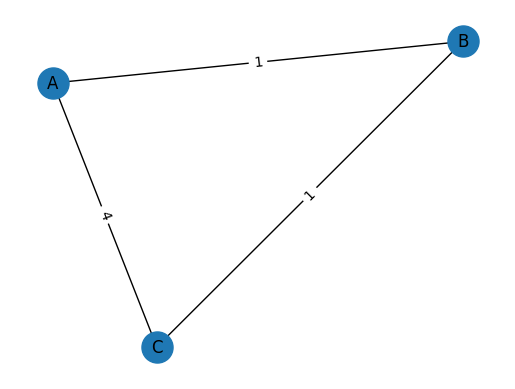

In [11]:
# Create an empty graph
G = nx.Graph()

# Define the vertices
vertices = ['A', 'B', 'C']

# Add nodes to the graph
G.add_nodes_from(vertices)

# Define the edges with their weights
edges = [('A', 'B', 1), ('A', 'C', 4), ('B', 'C', 1)]

# Add edges to the graph with their weights
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=500)

# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1)

# Draw edge labels
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Draw node labels
node_labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels)

# Show the graph
plt.axis('off')
plt.show()

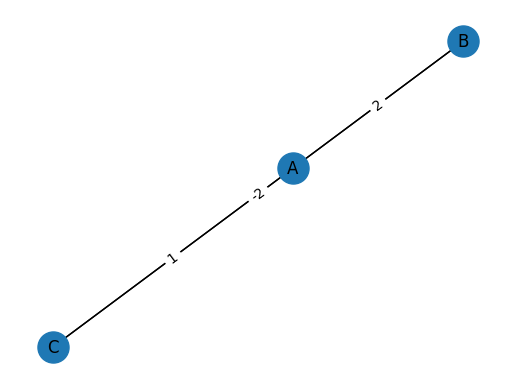

In [15]:
# Create an empty graph
G = nx.Graph()

# Define the vertices
vertices = ['A', 'B', 'C']

# Add nodes to the graph
G.add_nodes_from(vertices)

# Define the edges with their weights
edges = [('A', 'B', 2), ('B', 'C', -2), ('A', 'C', 1)]

# Add edges to the graph with their weights
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=500)

# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1)

# Draw edge labels
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Draw node labels
node_labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels)

# Show the graph
plt.axis('off')
plt.show()

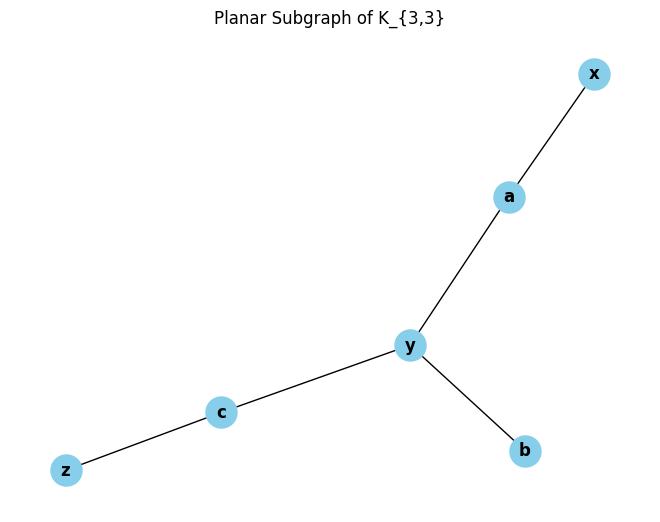

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes from both partitions
nodes_1 = ['a', 'b', 'c']
nodes_2 = ['x', 'y', 'z']
G.add_nodes_from(nodes_1)
G.add_nodes_from(nodes_2)

# Add edges between nodes of different partitions
edges = [('a', 'x'), ('a', 'y'), 
         ('b', 'y'),
        ('c', 'y'), ('c', 'z')]
G.add_edges_from(edges)

# Create a planar subgraph by selecting a subset of edges
planar_edges = [('a', 'x'), ('b', 'y'), ('c', 'z')]
planar_nodes = set()
for edge in planar_edges:
    planar_nodes.add(edge[0])
    planar_nodes.add(edge[1])

# Create a subgraph containing only the selected edges
planar_subgraph = G.subgraph(planar_nodes)

# Draw the planar subgraph
pos = nx.spring_layout(planar_subgraph)
nx.draw(planar_subgraph, pos, with_labels=True, node_size=500, node_color='skyblue', font_weight='bold', font_size=12)
plt.title('Planar Subgraph of K_{3,3}')
plt.show()

